imports

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

config

In [4]:
config_datasheet = r'./results/preprocessed_posttest.xlsx'

import df

In [5]:
raw = pd.read_excel(config_datasheet)
df = pd.DataFrame(raw)
df

,Unique Code,ResponseTime,Algorithm,Flag,Correctness,Difficulty,ClickData
0,6aOGho,122,CommonChars,NaN,True,1,95-33 170-86 233-160 196-191 132-247 175-296 1...
1,4iMVha,34,CommonChars,NaN,True,1,141-67 142-39 145-59 141-92 153-136 155-153 15...
2,8aRHui,53,CommonChars,NaN,True,1,174-331 169-273 157-228 151-155 136-81 151-53 ...
3,8lHHsu,69,CommonChars,NaN,True,1,78-23 97-22 179-73 184-57 194-42 209-98 189-55...
4,9oMWun,63,CommonChars,NaN,False,1,118-24 176-51 200-91 223-140 196-155 172-172 1...
...,...,...,...,...,...,...,...
215,1nCWte,73,SquareRoot,NaN,False,5,276-298 241-233 242-258 245-279 250-257 250-25...
216,1eASaa,137,SquareRoot,NaN,True,1,218-78 209-38 236-62 231-86 127-38 135-54 153-...
217,5nFKho,111,SquareRoot,NaN,False,1,38-7 198-77 111-11 106-59 141-40 233-51 173-81...
218,9aBWha,40,SquareRoot,NaN,True,1,138-37 147-74 172-58 165-110 154-133 171-194 1...


remove outliers

In [6]:
mean = float(df["ResponseTime"].mean())
stddev = float(df["ResponseTime"].std())

print(stddev, mean)

for row_idx, row in df.iterrows():
    response_time = row["ResponseTime"]
                
    if response_time <= 30 and row["Correctness"] == False or response_time >= mean+3*stddev:
        df.loc[row_idx, "Flag"] = "Outlier"


df.loc[df["Flag"]=="Outlier", "ResponseTime"] = mean

102.46522154971025 90.27272727272727


In [7]:
for row_idx, row in df.iterrows():
    unique_code = row["Unique Code"]
    entries_id_df = df.loc[(df["Unique Code"] == unique_code) & (df["Flag"] == "Outlier")]
    
    number_of_outliers_per_subject = len(entries_id_df)
    
    if number_of_outliers_per_subject > 2:
        print("Participant with the following number got deleted: " + str(unique_code) + ". Because " + str(number_of_outliers_per_subject) + " where missing.")
        df = df.loc[df["Unique Code"]!=unique_code]


In [8]:
df.to_excel("results/data_of_all_removed_posttest.xlsx")

create result

In [9]:
df["ResponseTime"].describe()

count    220.000000
mean      81.510744
std       54.021074
min       12.000000
25%       45.750000
50%       68.500000
75%      102.000000
max      302.000000
Name: ResponseTime, dtype: float64

In [10]:
import matplotlib.pyplot as plt

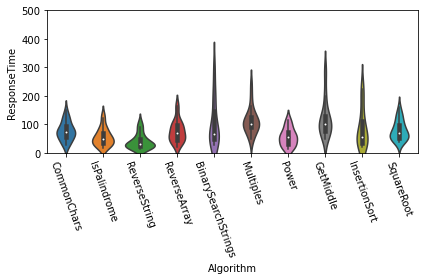

In [11]:
plt.ylim(0, 500)
ax = sns.violinplot(x="Algorithm", y="ResponseTime", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=290)

plt.tight_layout()
plt.savefig("results/behavioral/violin_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

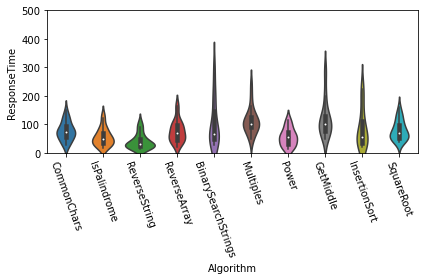

In [12]:
plt.ylim(0, 500)
ax = sns.violinplot(x="Algorithm", y="ResponseTime", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=290)

plt.tight_layout()
plt.savefig("results/behavioral/violin_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

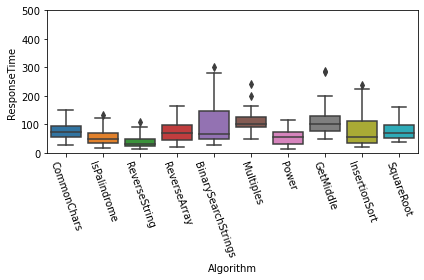

In [13]:
plt.ylim(0, 500)
ax = sns.boxplot(x="Algorithm", y="ResponseTime", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=290)

plt.tight_layout()
plt.savefig("results/behavioral/box_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

In [94]:
from scipy.stats import f_oneway

response_times = [[] for _ in range(10)]

algo_names = df["Algorithm"].dropna().unique()
students = df["Unique Code"].dropna().unique()

for i in range(len(algo_names)):
    for j in range(len(students)):
        response_times[i].append(df.iloc[(i*22)+j][1])
        
#f_oneway(response_times[0], response_times[1], response_times[2], response_times[3], response_times[4], 
#         response_times[5], response_times[6], response_times[7], response_times[8], response_times[9])

f_oneway(response_times)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

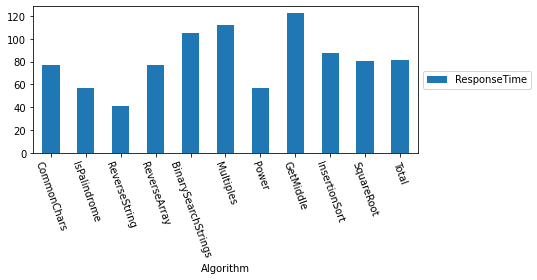

In [14]:
bar_df = pd.DataFrame([],columns=["ResponseTime", "Algorithm"])

algo_names = df["Algorithm"].dropna().unique()

for algo_name in algo_names:
    mean = float(df.loc[df["Algorithm"] == algo_name]["ResponseTime"].mean())
    
    bar_df = bar_df.append(pd.DataFrame([[mean, algo_name]], columns=["ResponseTime", "Algorithm"]))
    
bar_df = bar_df.append(pd.DataFrame([[float(df["ResponseTime"].mean()), "Total"]], columns=["ResponseTime", "Algorithm"]))

ax = bar_df.plot.bar(rot=290, x='Algorithm', y='ResponseTime')
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_response_of_all.pdf", bbox_inches='tight', pad_inches=0.01)

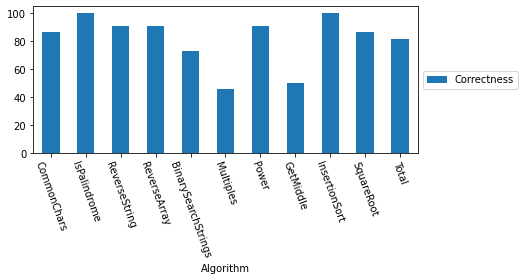

In [15]:
bar_df = pd.DataFrame([],columns=["Correctness", "Algorithm"])

for algo_name in algo_names:
    mean = float(df.loc[df["Algorithm"] == algo_name]["Correctness"].mean())
    mean *= 100
    bar_df = bar_df.append(pd.DataFrame([[mean, algo_name]], columns=["Correctness", "Algorithm"]))
    
bar_df = bar_df.append(pd.DataFrame([[float(df["Correctness"].mean()*100), "Total"]], columns=["Correctness", "Algorithm"]))

ax = bar_df.plot.bar(rot=290, x='Algorithm', y='Correctness')
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_correctness_of_all.pdf", bbox_inches='tight', pad_inches=0.01)


[1 2 3 4 5]


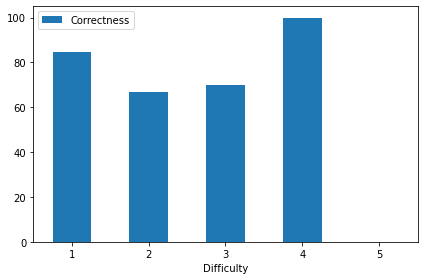

In [16]:
bar_df_correctness_difficulty = pd.DataFrame([],columns=["Correctness", "Difficulty"])

print(df["Difficulty"].unique())
difficulties = df["Difficulty"].unique()
difficulties.sort()

for difficulty in difficulties:
    mean = float(df.loc[df["Difficulty"] == difficulty]["Correctness"].mean())
    mean*= 100
    bar_df_correctness_difficulty = bar_df_correctness_difficulty.append(pd.DataFrame([[mean, difficulty]], columns=["Correctness", "Difficulty"]))
    
ax = bar_df_correctness_difficulty.plot.bar(rot=0, x='Difficulty', y='Correctness')
plt.tight_layout()
ax.legend(loc="upper left")
plt.savefig("results/behavioral/bar_correctness_difficulty_of_all.pdf", bbox_inches='tight', pad_inches=0.01)


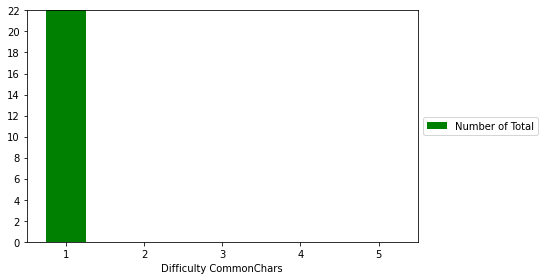

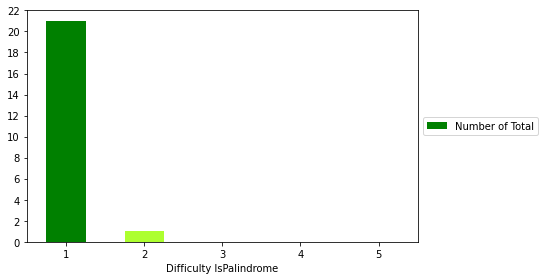

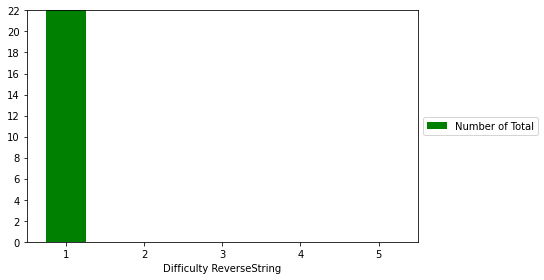

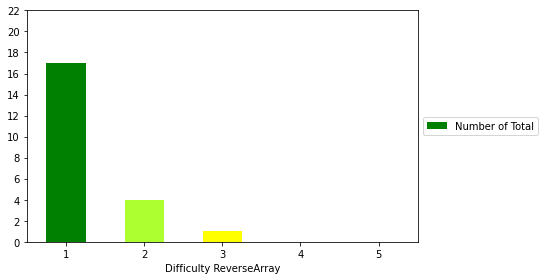

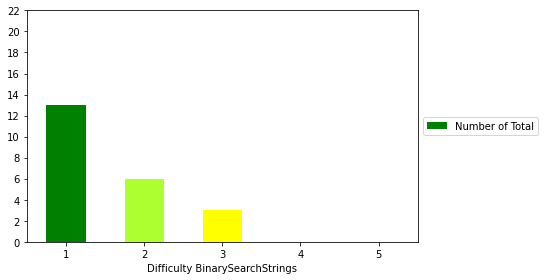

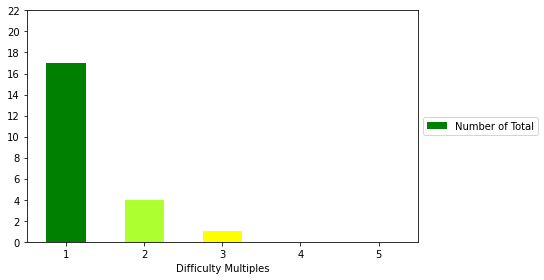

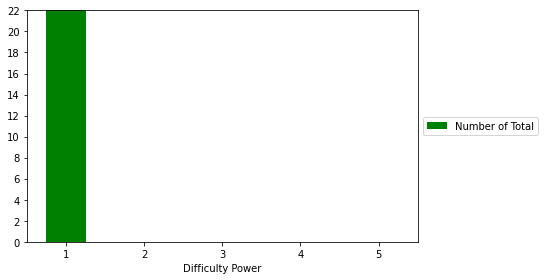

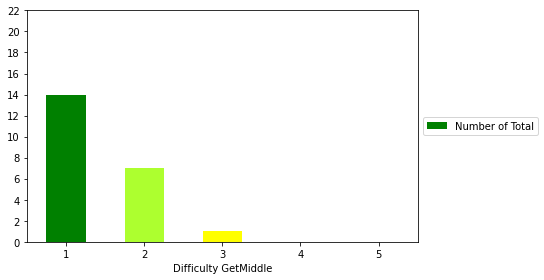

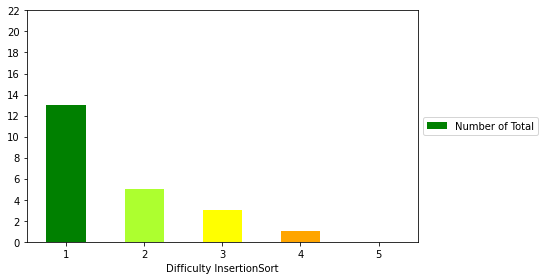

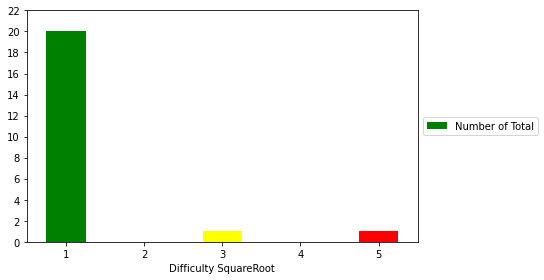

In [17]:
cols = ["Algorithm", "Difficulty", "Number of Corrects", "Number of Total"]
bar_df_array = []

max_number_of_corrects = 0
max_number_of_total = 0

for algo_name in algo_names:
    bar_df = df.loc[df["Algorithm"]==algo_name]
    tmp_df = pd.DataFrame([],columns=cols)
    for i in range(1, 6):
        difficulty_df = bar_df.loc[bar_df["Difficulty"] == i]
        number_of_corrects = len(difficulty_df.loc[difficulty_df["Correctness"]== True])
        max_number_of_corrects = max(max_number_of_corrects, number_of_corrects)
        number_of_all = len(difficulty_df)
        max_number_of_total = max(max_number_of_total, number_of_all)
        tmp_df = tmp_df.append(pd.DataFrame([[algo_name, i, number_of_corrects, number_of_all]],columns=cols))
    bar_df_array.append(tmp_df)

    
for i in range(10):
    ax = bar_df_array[i].plot.bar(rot=360, x='Difficulty', y='Number of Total', color=["g", "greenyellow", "yellow", "orange", "r"])
    ax.set_ylim(0, max_number_of_corrects+1)
    ax.set_yticks(np.arange(0, max_number_of_corrects+2, 2))
    plt.tight_layout()
    ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
    ax.set_xlabel("Difficulty {}".format(algo_names[i]))
    plt.savefig("results/behavioral/bar_difficulty_total_"+algo_names[i]+".pdf", bbox_inches='tight', pad_inches=0.01)

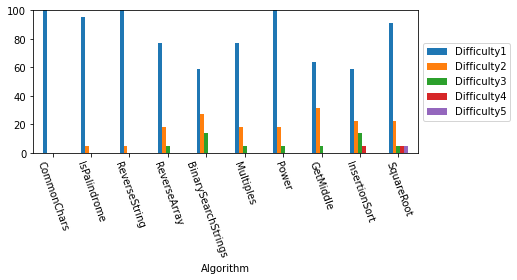

In [18]:
cols = ["Algorithm", "Difficulty1", "Difficulty2", "Difficulty3", "Difficulty4", "Difficulty5"]
bar_df = pd.DataFrame([],columns=cols)


df_diff = []

for i in range(1, 6):
    df_diff.append(df.loc[df["Difficulty"]==i].drop("ClickData", axis=1))

    
percent_diff = [0, 0, 0, 0, 0]

for algo_name in algo_names:
    tmp = bar_df.loc[df["Algorithm"]==algo_name]
    number_of_all = len(df.loc[df["Algorithm"]==algo_name])
    number_diff = []

    for i in range(0, 5):
        number_diff.append(len(df_diff[i].loc[df["Algorithm"]==algo_name]))
        if number_diff[i] > 0:
            percent_diff[i] = (number_diff[i] / number_of_all) * 100
        
    bar_df = bar_df.append(pd.DataFrame([[algo_name, percent_diff[0], percent_diff[1], percent_diff[2], percent_diff[3], percent_diff[4]]], columns=cols))

bar_df = bar_df.set_index('Algorithm')
ax = bar_df.plot.bar(rot=290)
ax.set_ylim(0.0, 100)
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_tmp.pdf", bbox_inches='tight', pad_inches=1)

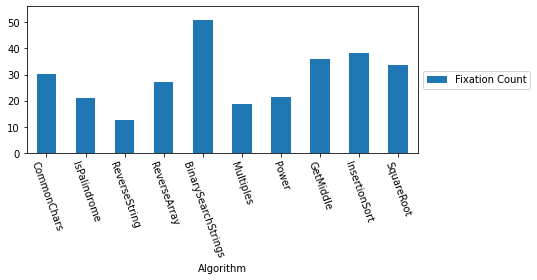

In [19]:
click_log = df["ClickData"].unique()

cols = ["Algorithm", "Fixation Count"]
bar_df = pd.DataFrame([],columns=cols)

list_of_average_lists = []
for algo in algo_names:
    clicks = []
    tmp_df = df.loc[df["Algorithm"] == algo]["ClickData"]
    tmp_list = []
    
    for tmp in tmp_df:
        tmp = str(tmp)
        tmp = tmp.split()
        tmp_list.append(len(tmp))
    list_of_average_lists.append(tmp_list)
average_list = []

for i in range(len(list_of_average_lists)):
    average_list.append(sum(list_of_average_lists[i]) / len(list_of_average_lists[i]))

max_average = max(average_list)

for i in range(len(average_list)):
    bar_df = bar_df.append(pd.DataFrame([[algo_names[i], average_list[i]]], columns=cols))

bar_df = bar_df.set_index('Algorithm')
ax = bar_df.plot.bar(rot=290)
ax.set_ylim(0, max_average + max_average*0.1)
plt.tight_layout()
ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("results/behavioral/bar_fixation_count_total.pdf", bbox_inches='tight', pad_inches=1)

In [23]:
cols=['Unique Code', 'Points']

students = df["Unique Code"].dropna().unique()

data = [[] for x in range(len(students))]

for i in range(len(students)):
    number_of_corrects = len(df.loc[(df["Correctness"] == True) & (df["Unique Code"]== students[i])])
    data[i].append(students[i])
    data[i].append(number_of_corrects)
    
result_df = pd.DataFrame(data,columns=cols)
result_df.to_excel("results/points_posttest.xlsx") 

KeyError: 'CommonChars'